# Linguistic Networks. Lab 1.

In [2]:
import nltk
from nltk.util import ngrams
from nltk import word_tokenize

In [3]:
from collections import Counter
from operator import itemgetter

In [4]:
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline
sns.set(style="whitegrid")

In [6]:
import sys
print sys.version
print nltk.__version__
print nx.__version__
print pd.__version__
print sns.__version__

2.7.11 |Anaconda 2.5.0 (x86_64)| (default, Dec  6 2015, 18:57:58) 
[GCC 4.2.1 (Apple Inc. build 5577)]
3.1
1.11
0.18.1
0.7.0


In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ulyanasidorova/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     /Users/ulyanasidorova/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [9]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ulyanasidorova/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Rank - Frequency plot

## Задание 1

In [11]:
scn_corpus = ""

# импортируем корпус сицилийской Википедии
with open("scn.crp.txt", 'r') as f:
    scn_corpus = f.read().decode('string-escape').decode("utf-8")
scn_tokens = nltk.word_tokenize(scn_corpus.lower())

In [12]:
# Убираем стоп-слова (слова длиной меньше 3 и слова длины от 2 до 5, начинающиеся на h – это вспомогательный глагол "быть")
scn_tokens = [word for word in scn_tokens if word.isalnum() and len(word) > 2 and not
              (word.startswith("h") and len(word) < 5)]
scn_count = Counter(scn_tokens)
most = scn_count.most_common(50)
for word in most:
    print(word)

(u'nt\xf4', 10318)
(u'comu', 7021)
(u'nta', 6194)
(u'cumuni', 6054)
(u'pruvincia', 5957)
(u'chi', 5692)
(u'cchi\xf9', 5320)
(u'nun', 4838)
(u'nt\xe2', 4722)
(u'sunnu', 3881)
(u'abbitanti', 3837)
(u'talianu', 3236)
(u'puru', 3083)
(u'supra', 2996)
(u'parti', 2934)
(u'tra', 2847)
(u'era', 2788)
(u'sicilia', 2734)
(u'macari', 2457)
(u'assai', 2419)
(u'pupulazzioni', 2383)
(u'nomu', 2324)
(u'stu', 2307)
(u'tutti', 2298)
(u'granni', 2264)
(u'veni', 2230)
(u'unni', 2223)
(u'nti', 2216)
(u'statu', 2202)
(u'prima', 2201)
(u'lingua', 2184)
(u'san', 2115)
(u'quannu', 2009)
(u'doppu', 1997)
(u'dui', 1965)
(u'circa', 1907)
(u'gruppu', 1874)
(u'sicilianu', 1854)
(u'nt\xea', 1837)
(u'sta', 1775)
(u'paisi', 1764)
(u'cui', 1673)
(u'citati', 1634)
(u'sulu', 1617)
(u'canzuni', 1591)
(u'cit\xe0', 1589)
(u'storia', 1581)
(u's\xe8culu', 1575)
(u'unu', 1523)
(u'the', 1484)


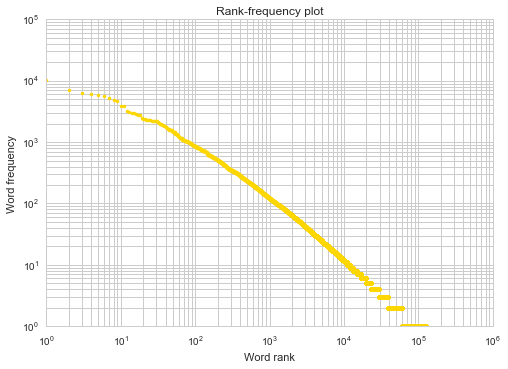

In [13]:
x = range(1,len(scn_count.values())+1)
plt.plot(x,sorted(scn_count.values(),reverse=True),'.',color="gold")
plt.xscale('log')
plt.yscale('log')
plt.grid(True,which='both')
plt.ylabel('Word frequency')
plt.xlabel('Word rank')
plt.title('Rank-frequency plot')
plt.show()

### Hyponyms network

In [13]:
from nltk.corpus import wordnet as wn

In [14]:
good = wn.synsets('good') 
bad = wn.synsets('bad') 
print good
print bad

[Synset('good.n.01'), Synset('good.n.02'), Synset('good.n.03'), Synset('commodity.n.01'), Synset('good.a.01'), Synset('full.s.06'), Synset('good.a.03'), Synset('estimable.s.02'), Synset('beneficial.s.01'), Synset('good.s.06'), Synset('good.s.07'), Synset('adept.s.01'), Synset('good.s.09'), Synset('dear.s.02'), Synset('dependable.s.04'), Synset('good.s.12'), Synset('good.s.13'), Synset('effective.s.04'), Synset('good.s.15'), Synset('good.s.16'), Synset('good.s.17'), Synset('good.s.18'), Synset('good.s.19'), Synset('good.s.20'), Synset('good.s.21'), Synset('well.r.01'), Synset('thoroughly.r.02')]
[Synset('bad.n.01'), Synset('bad.a.01'), Synset('bad.s.02'), Synset('bad.s.03'), Synset('bad.s.04'), Synset('regretful.a.01'), Synset('bad.s.06'), Synset('bad.s.07'), Synset('bad.s.08'), Synset('bad.s.09'), Synset('bad.s.10'), Synset('bad.s.11'), Synset('bad.s.12'), Synset('bad.s.13'), Synset('bad.s.14'), Synset('badly.r.05'), Synset('badly.r.06')]


In [15]:
import networkx as nx
import matplotlib.pyplot as plt

In [16]:
G_good = nx.DiGraph()
for word in good:
    G_good.add_edge(good[0].name().split('.')[0], word.name().split('.')[0])
print nx.info(G_good)    

Name: 
Type: DiGraph
Number of nodes: 11
Number of edges: 11
Average in degree:   1.0000
Average out degree:   1.0000


In [17]:
G_bad = nx.DiGraph()
for word in bad:
    G_bad.add_edge(bad[0].name().split('.')[0], word.name().split('.')[0])
print nx.info(G_bad)    

Name: 
Type: DiGraph
Number of nodes: 3
Number of edges: 3
Average in degree:   1.0000
Average out degree:   1.0000


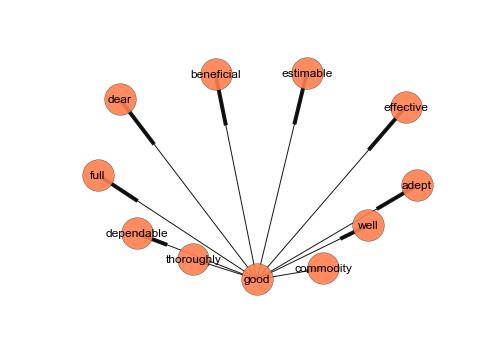

In [18]:
plt.axis('off')
nx.draw_networkx(G_good, with_labels=True, node_size=1000, font_size=12, node_shape='o', alpha=0.9, node_color='coral')

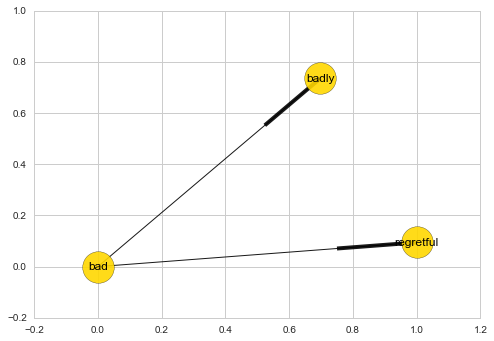

In [19]:
nx.draw_networkx(G_bad, with_labels=True, node_size=1000, font_size=12, node_shape='o', alpha=0.9, node_color='gold')

In [20]:
car = wn.synsets('car')[0]
parts = car.part_meronyms()
print parts

[Synset('accelerator.n.01'), Synset('air_bag.n.01'), Synset('auto_accessory.n.01'), Synset('automobile_engine.n.01'), Synset('automobile_horn.n.01'), Synset('buffer.n.06'), Synset('bumper.n.02'), Synset('car_door.n.01'), Synset('car_mirror.n.01'), Synset('car_seat.n.01'), Synset('car_window.n.01'), Synset('fender.n.01'), Synset('first_gear.n.01'), Synset('floorboard.n.02'), Synset('gasoline_engine.n.01'), Synset('glove_compartment.n.01'), Synset('grille.n.02'), Synset('high_gear.n.01'), Synset('hood.n.09'), Synset('luggage_compartment.n.01'), Synset('rear_window.n.01'), Synset('reverse.n.02'), Synset('roof.n.02'), Synset('running_board.n.01'), Synset('stabilizer_bar.n.01'), Synset('sunroof.n.01'), Synset('tail_fin.n.02'), Synset('third_gear.n.01'), Synset('window.n.02')]


In [21]:
G_car = nx.DiGraph()
for word in parts:
    G_car.add_edge("car", " ".join(word.name().split(".")[0].split("_")))

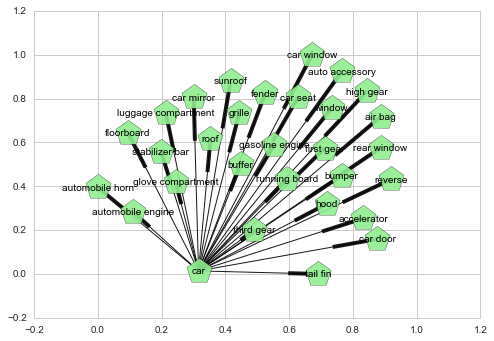

In [22]:
nx.draw_networkx(G_car, with_labels=True, node_size=700, font_size=10, node_shape='p', alpha=0.9, node_color='lightgreen')

## Co-occurence network

### Домашнее задание: coocurrence for sicilian wikipedia

In [14]:
bigrams = list(ngrams(scn_tokens,2))
print len(bigrams)

# Most common bigrams:
ct = Counter(bigrams)
bmct = ct.most_common(15)
print(bmct)

984949
[((u'cumuni', u'talianu'), 2388), ((u'talianu', u'pruvincia'), 2305), ((u'cumuni', u'pruvincia'), 1723), ((u'pupulazzioni', u'abbitanti'), 1223), ((u'nt\xf4', u'piemunti'), 1197), ((u'abbitanti', u'pruvincia'), 658), ((u'stati', u'uniti'), 591), ((u'cchi\xf9', u'granni'), 589), ((u'cchi\xf9', u'mpurtanti'), 512), ((u'circa', u'abbitanti'), 466), ((u'cumuni', u'abbitanti'), 461), ((u'stu', u'nomu'), 414), ((u'freddie', u'mercury'), 392), ((u'nt\xe2', u'sardigna'), 368), ((u'francisi', u'stu'), 365)]


In [15]:
common_bigrams = Counter()
for word in bmct:
    common_bigrams[word[0]] = word[1]

G1=nx.Graph()
G1.add_edges_from(common_bigrams)
print nx.info(G1)

Name: 
Type: Graph
Number of nodes: 20
Number of edges: 15
Average degree:   1.5000


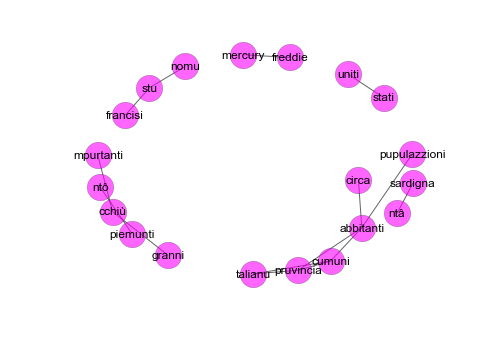

In [16]:
plt.axis('off')
nx.draw_networkx(G1,with_labels=True,node_size=700,font_size=12, alpha=0.6, node_color="magenta")

In [17]:
A = nx.adjacency_matrix(G1)
print A

  (0, 9)	1
  (1, 5)	1
  (2, 18)	1
  (3, 4)	1
  (4, 3)	1
  (4, 11)	1
  (4, 13)	1
  (4, 15)	1
  (5, 1)	1
  (6, 17)	1
  (7, 11)	1
  (7, 15)	1
  (8, 16)	1
  (9, 0)	1
  (10, 12)	1
  (10, 14)	1
  (11, 4)	1
  (11, 7)	1
  (11, 15)	1
  (12, 10)	1
  (13, 4)	1
  (14, 10)	1
  (15, 4)	1
  (15, 7)	1
  (15, 11)	1
  (16, 8)	1
  (17, 6)	1
  (17, 19)	1
  (18, 2)	1
  (19, 17)	1


In [18]:
print A.todense()

[[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]]


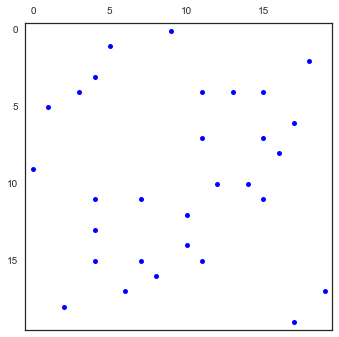

In [19]:
sns.set(style="white")
plt.spy(A, precision=0, marker='.', markersize=10)
plt.show()

In [20]:
GW=nx.Graph()
for x in common_bigrams.items(): GW.add_edge(x[0][0],x[0][1],weight=x[1])

In [21]:
print GW.edges(data=True)

[(u'mercury', u'freddie', {'weight': 392}), (u'sardigna', u'nt\xe2', {'weight': 368}), (u'uniti', u'stati', {'weight': 591}), (u'circa', u'abbitanti', {'weight': 466}), (u'abbitanti', u'pruvincia', {'weight': 658}), (u'abbitanti', u'cumuni', {'weight': 461}), (u'abbitanti', u'pupulazzioni', {'weight': 1223}), (u'granni', u'cchi\xf9', {'weight': 589}), (u'talianu', u'pruvincia', {'weight': 2305}), (u'talianu', u'cumuni', {'weight': 2388}), (u'nt\xf4', u'piemunti', {'weight': 1197}), (u'stu', u'francisi', {'weight': 365}), (u'stu', u'nomu', {'weight': 414}), (u'cumuni', u'pruvincia', {'weight': 1723}), (u'cchi\xf9', u'mpurtanti', {'weight': 512})]


In [22]:
AW = nx.adjacency_matrix(GW)
print AW.todense()

[[   0    0    0    0    0    0    0    0    0  392    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0  368    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0  591    0]
 [   0    0    0    0  466    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0  466    0    0    0    0    0    0    0  461    0 1223
     0  658    0    0    0    0]
 [   0  368    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0  589    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0 2388    0    0
     0 2305    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0 1197    0    0    0]
 [ 392    0    0    0    0    0    0    0    0    0    

In [23]:
df = nx.to_pandas_dataframe(GW)

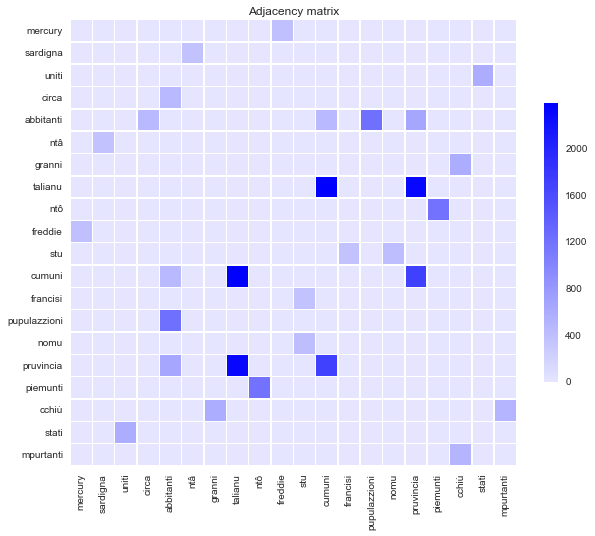

In [24]:
cmap=sns.light_palette(color='blue',n_colors=6,as_cmap=True)
#cmap=sns.diverging_palette(220, 10,as_cmap=True)


plt.figure(figsize=(10,10))
plt.title('Adjacency matrix')
sns.heatmap(df,square=True,annot=False,cmap=cmap,linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### Network properties

In [25]:
bigrams = ct.most_common(40)
print(bigrams)
print(len(bigrams))

[((u'cumuni', u'talianu'), 2388), ((u'talianu', u'pruvincia'), 2305), ((u'cumuni', u'pruvincia'), 1723), ((u'pupulazzioni', u'abbitanti'), 1223), ((u'nt\xf4', u'piemunti'), 1197), ((u'abbitanti', u'pruvincia'), 658), ((u'stati', u'uniti'), 591), ((u'cchi\xf9', u'granni'), 589), ((u'cchi\xf9', u'mpurtanti'), 512), ((u'circa', u'abbitanti'), 466), ((u'cumuni', u'abbitanti'), 461), ((u'stu', u'nomu'), 414), ((u'freddie', u'mercury'), 392), ((u'nt\xe2', u'sardigna'), 368), ((u'francisi', u'stu'), 365), ((u'lingua', u'siciliana'), 363), ((u'nt\xf4', u'tirolu'), 330), ((u'pupulazzioni', u'circa'), 328), ((u'pruvincia', u'turinu'), 316), ((u'turinu', u'nt\xf4'), 313), ((u'regnu', u'unitu'), 273), ((u'sicilianu', u'standard'), 272), ((u'duminiu', u'internet'), 261), ((u'internet', u'assignatu'), 256), ((u'cumuna', u'francisi'), 253), ((u'pruvincia', u'cuneu'), 250), ((u'cuneu', u'nt\xf4'), 248), ((u'prima', u'vota'), 243), ((u'chiesia', u'cattolica'), 240), ((u'brian', u'may'), 234), ((u'tuttu

In [26]:
G2 = nx.Graph()
G2.add_edges_from(bigrams)
print nx.info(G2)

Name: 
Type: Graph
Number of nodes: 79
Number of edges: 40
Average degree:   1.0127


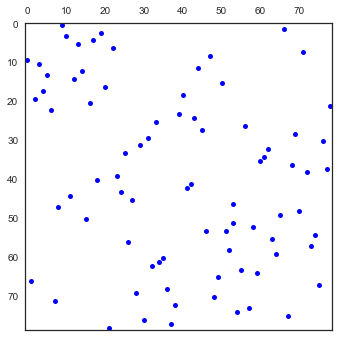

In [27]:
A2 = nx.adjacency_matrix(G2)
plt.spy(A2, precision=0, marker='.', markersize=10)
plt.show()

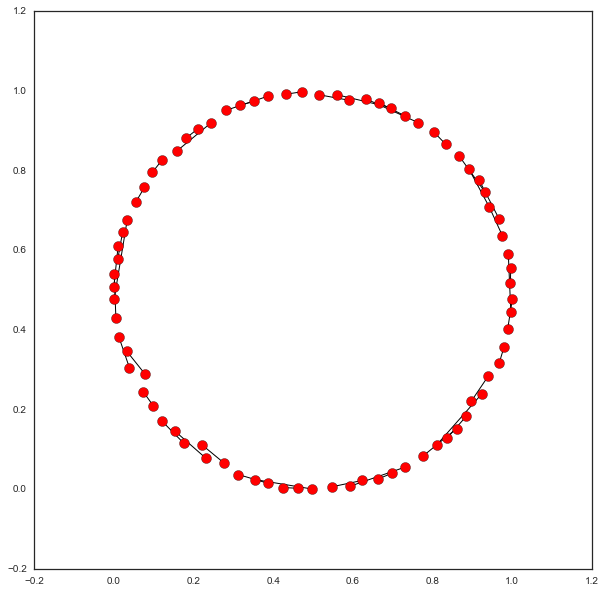

In [28]:
plt.figure(figsize=(10,10))
nx.draw_networkx(G2,with_labels=False,node_size=100,)
plt.axis('equal')
plt.show()

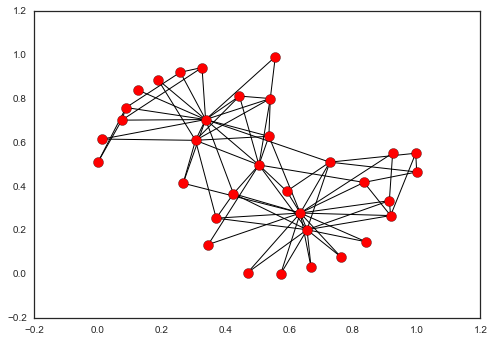

#### Node degree distribution

In [32]:
print sorted(nx.degree(G2).items(),reverse=True,key = itemgetter(1))

[(215, 2), (512, 1), (2305, 1), ((u'cchi\xf9', u'granni'), 1), ((u'internet', u'assignatu'), 1), (261, 1), ((u'abbitanti', u'pruvincia'), 1), (392, 1), (256, 1), (365, 1), (272, 1), (273, 1), (658, 1), ((u'regnu', u'unitu'), 1), ((u'cumuni', u'talianu'), 1), ((u'chiesia', u'cattolica'), 1), ((u'duminiu', u'internet'), 1), ((u'unu', u'cchi\xf9'), 1), (414, 1), (368, 1), ((u'prima', u'vota'), 1), ((u'freddie', u'mercury'), 1), ((u'circa', u'abbitanti'), 1), ((u'pupulazzioni', u'circa'), 1), ((u'cumuni', u'abbitanti'), 1), ((u'cumuni', u'pruvincia'), 1), ((u'cchi\xf9', u'mpurtanti'), 1), (1197, 1), ((u'nt\xe2', u'sardigna'), 1), ((u'pruvincia', u'trentu'), 1), ((u'pruvincia', u'cuneu'), 1), ((u'stu', u'nomu'), 1), (313, 1), (1723, 1), (316, 1), ((u'puru', u'siddu'), 1), (591, 1), ((u'cumuna', u'francisi'), 1), (328, 1), (330, 1), ((u'nt\xf4', u'tirolu'), 1), (589, 1), ((u'sicilianu', u'standard'), 1), (461, 1), ((u'trentu', u'nt\xf4'), 1), ((u'friuli', u'venezzia'), 1), (210, 1), (211, 1)

In [33]:
d=nx.degree_histogram(G2)
c = range(0,len(d),1)

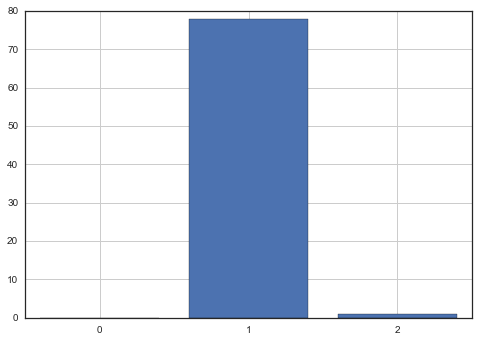

In [61]:
plt.bar(c,d,align='center')
# plt.plot(d,'.', ms =10)
plt.xticks(c)
# plt.yscale('log')
# plt.xscale('log')
plt.grid(True,which='both')
plt.show()

Такая диаграмма получилась, потому что в нашем графе вершины обычно связаны попарно...

#### Small diameter

In [38]:
print nx.is_connected(G2)

False


Так как наш граф не является связанным, возьмём стандартные данные karate_club

In [41]:
G = nx.karate_club_graph()
print nx.is_connected(G)

True


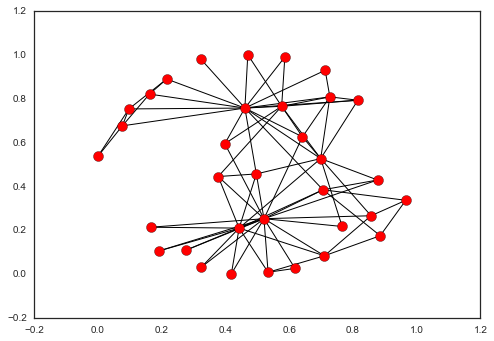

In [66]:
nx.draw_networkx(G,with_labels=False,node_size=100,)

Так как в предыдущем задании были проблемы с построением гистограммы, построим её для этого графа.

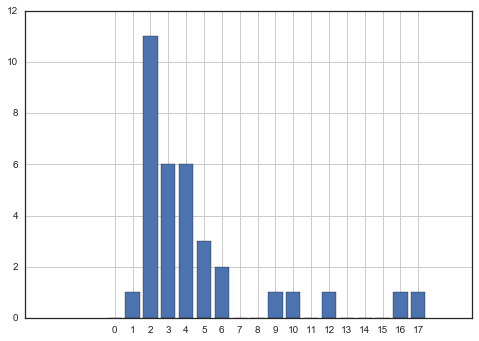

In [65]:
d=nx.degree_histogram(G)
c = range(0,len(d),1)
plt.bar(c,d,align='center')
# plt.plot(d,'.', ms =10)
plt.xticks(c)
# plt.yscale('log')
# plt.xscale('log')
plt.grid(True,which='both')
plt.show()

Какая красивая гистограмма, глаз радует!

In [45]:
print nx.center(G)
print nx.periphery(G)

[0, 1, 2, 3, 8, 13, 19, 31]
[14, 15, 16, 18, 20, 22, 23, 26, 29]


In [46]:
print nx.diameter(G)

5


In [47]:
print nx.average_shortest_path_length(G)

2.40819964349


#### Clustering coefficient

In [48]:
print sum(nx.triangles(G).values())/3
print nx.average_clustering(G)
print nx.transitivity(G)

45
0.570638478208
0.255681818182


### Centralities

Центральности тоже я сделала на данных карате клуба

In [67]:
dcent = nx.degree_centrality(G)
print sorted(dcent.items(),reverse=True,key = itemgetter(1))

[(33, 0.5151515151515151), (0, 0.48484848484848486), (32, 0.36363636363636365), (2, 0.30303030303030304), (1, 0.2727272727272727), (3, 0.18181818181818182), (31, 0.18181818181818182), (8, 0.15151515151515152), (13, 0.15151515151515152), (23, 0.15151515151515152), (5, 0.12121212121212122), (6, 0.12121212121212122), (7, 0.12121212121212122), (27, 0.12121212121212122), (29, 0.12121212121212122), (30, 0.12121212121212122), (4, 0.09090909090909091), (10, 0.09090909090909091), (19, 0.09090909090909091), (24, 0.09090909090909091), (25, 0.09090909090909091), (28, 0.09090909090909091), (9, 0.06060606060606061), (12, 0.06060606060606061), (14, 0.06060606060606061), (15, 0.06060606060606061), (16, 0.06060606060606061), (17, 0.06060606060606061), (18, 0.06060606060606061), (20, 0.06060606060606061), (21, 0.06060606060606061), (22, 0.06060606060606061), (26, 0.06060606060606061), (11, 0.030303030303030304)]


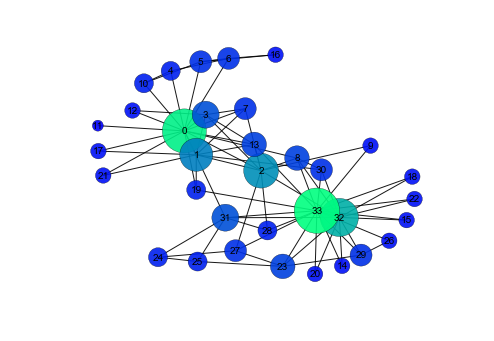

In [68]:
sizes = [x*4000 for x in dcent.values()]
colors = [float(x) for x in dcent.values()]
plt.axis('off')
nx.draw_networkx(G,with_labels=True,node_size=sizes,node_color = colors,cmap = plt.cm.winter,font_size=10,alpha=0.9)

In [69]:
bcent=nx.betweenness_centrality(G)
print sorted(bcent.items(),reverse=True,key = itemgetter(1))

[(0, 0.4376352813852815), (33, 0.304074975949976), (32, 0.145247113997114), (2, 0.14365680615680618), (31, 0.13827561327561325), (8, 0.05592682780182781), (1, 0.053936688311688304), (13, 0.04586339586339586), (19, 0.03247504810004811), (5, 0.02998737373737374), (6, 0.029987373737373736), (27, 0.02233345358345358), (23, 0.017613636363636363), (30, 0.014411976911976907), (3, 0.011909271284271283), (25, 0.0038404882154882154), (29, 0.0029220779220779218), (24, 0.0022095959595959595), (28, 0.0017947330447330447), (9, 0.0008477633477633478), (4, 0.0006313131313131313), (10, 0.0006313131313131313), (7, 0.0), (11, 0.0), (12, 0.0), (14, 0.0), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.0), (20, 0.0), (21, 0.0), (22, 0.0), (26, 0.0)]


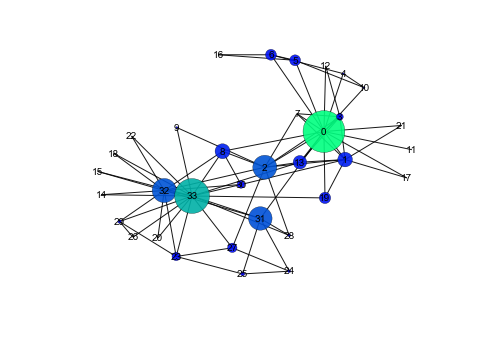

In [70]:
sizes = [x*4000 for x in bcent.values()]
colors = [float(x) for x in bcent.values()]
plt.axis('off')
nx.draw_networkx(G,with_labels=True,node_size=sizes,node_color = colors,cmap = plt.cm.winter,font_size=10,alpha=0.9)

In [71]:
ccent=nx.closeness_centrality(G)
print sorted(ccent.items(),reverse=True,key = itemgetter(1))

[(0, 0.5689655172413793), (2, 0.559322033898305), (33, 0.55), (31, 0.5409836065573771), (8, 0.515625), (13, 0.515625), (32, 0.515625), (19, 0.5), (1, 0.4852941176470588), (3, 0.4647887323943662), (27, 0.4583333333333333), (30, 0.4583333333333333), (28, 0.4520547945205479), (7, 0.44), (9, 0.4342105263157895), (23, 0.39285714285714285), (5, 0.38372093023255816), (6, 0.38372093023255816), (29, 0.38372093023255816), (4, 0.3793103448275862), (10, 0.3793103448275862), (17, 0.375), (21, 0.375), (24, 0.375), (25, 0.375), (12, 0.3707865168539326), (14, 0.3707865168539326), (15, 0.3707865168539326), (18, 0.3707865168539326), (20, 0.3707865168539326), (22, 0.3707865168539326), (11, 0.36666666666666664), (26, 0.3626373626373626), (16, 0.28448275862068967)]


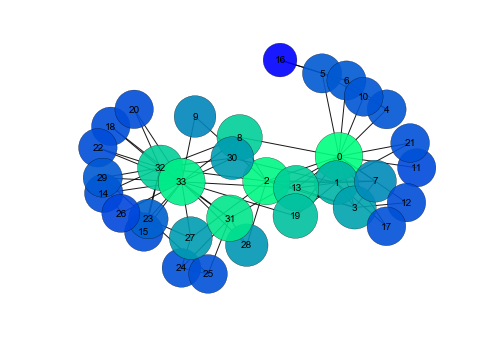

In [72]:
sizes = [x*4000 for x in ccent.values()]
colors = [float(x) for x in ccent.values()]
plt.axis('off')
nx.draw_networkx(G,with_labels=True,node_size=sizes,node_color = colors,cmap = plt.cm.winter,font_size=10,alpha=0.9)

In [73]:
ecent=nx.eigenvector_centrality_numpy(G)
print sorted(ecent.items(),reverse=True,key = itemgetter(1))

[(33, 0.37336347029148287), (0, 0.355491444524567), (2, 0.31719250448643155), (32, 0.30864421979104717), (1, 0.26595991955249176), (8, 0.22740390712540026), (13, 0.22647272014248135), (3, 0.2111797203778904), (31, 0.19103384140654367), (30, 0.17475830231435274), (7, 0.17095974804479627), (23, 0.15011857186115285), (19, 0.14791251029338748), (29, 0.13496081926232767), (27, 0.13347715338024), (28, 0.1310778229837108), (9, 0.10267425072358623), (20, 0.1014032621895246), (14, 0.10140326218952456), (15, 0.10140326218952454), (22, 0.10140326218952453), (18, 0.10140326218952447), (21, 0.09239953819570268), (17, 0.09239953819570261), (12, 0.08425462871671378), (5, 0.07948304511709951), (6, 0.07948304511709944), (10, 0.07596881818306901), (4, 0.07596881818306896), (26, 0.07557941348827205), (25, 0.059206474916778495), (24, 0.05705244054116567), (11, 0.05285569749352136), (16, 0.023635628104591404)]


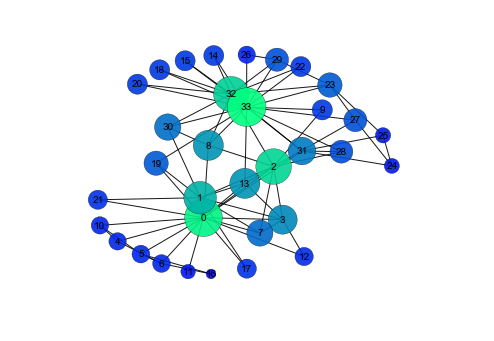

In [74]:
sizes = [x*4000 for x in ecent.values()]
colors = [float(x) for x in ecent.values()]
plt.axis('off')
nx.draw_networkx(G,with_labels=True,node_size=sizes,node_color = colors,cmap = plt.cm.winter,font_size=10,alpha=0.9)

In [75]:
df2=pd.DataFrame(data=[dcent,bcent,ccent,ecent]).transpose()
df2.columns=['Degree centrality','Betweenness centrality','Closensess centrality', 'Eigencentrality']
df2.sort_values("Eigencentrality", ascending=False,inplace=True)
df2

,Degree centrality,Betweenness centrality,Closensess centrality,Eigencentrality
33,0.515152,0.304075,0.550000,0.373363
0,0.484848,0.437635,0.568966,0.355491
2,0.303030,0.143657,0.559322,0.317193
32,0.363636,0.145247,0.515625,0.308644
1,0.272727,0.053937,0.485294,0.265960
8,0.151515,0.055927,0.515625,0.227404
13,0.151515,0.045863,0.515625,0.226473
3,0.181818,0.011909,0.464789,0.211180
31,0.181818,0.138276,0.540984,0.191034
30,0.121212,0.014412,0.458333,0.174758
